### TADA - YCSB AA Workload
- Data Prepare (metric)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

In [2]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)

metrics = metrics.replace([np.inf],9999999)


metrics

,tps,latency
0,0.216666,20847397
1,0.322221,12744942
2,3789.313102,1076
3,0.166667,12510551
4,0.266666,10686198
...,...,...
995,0.138889,11836756
996,0.149999,16386967
997,0.227778,19293708
998,0.188888,10529195


- Data Prepare (config)

In [3]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_AA/configs/my_*.cnf")


In [4]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_AA/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


- all_samples = config + metrics (1000 x 140) => AutoEncoder's input : Config + Metrics

In [5]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,91200,8000,63,7680,163577856,57344,104448,1,0.138889,11836756
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,89600,2000,29,11520,230686720,69632,61440,0,0.149999,16386967
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,66000,8000,48,12544,536870912,81920,108544,1,0.227778,19293708
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,70400,2000,57,3840,218103808,36864,63488,1,0.188888,10529195


In [6]:
discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [7]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [8]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data #1000)

In [ ]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = StandardScaler().fit(y_train_tps)
Y_scaler_latecy = StandardScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])


predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)

print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))




In [ ]:
from sklearn.metrics import r2_score

#Column 0 :TPS
#Column 1 : Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

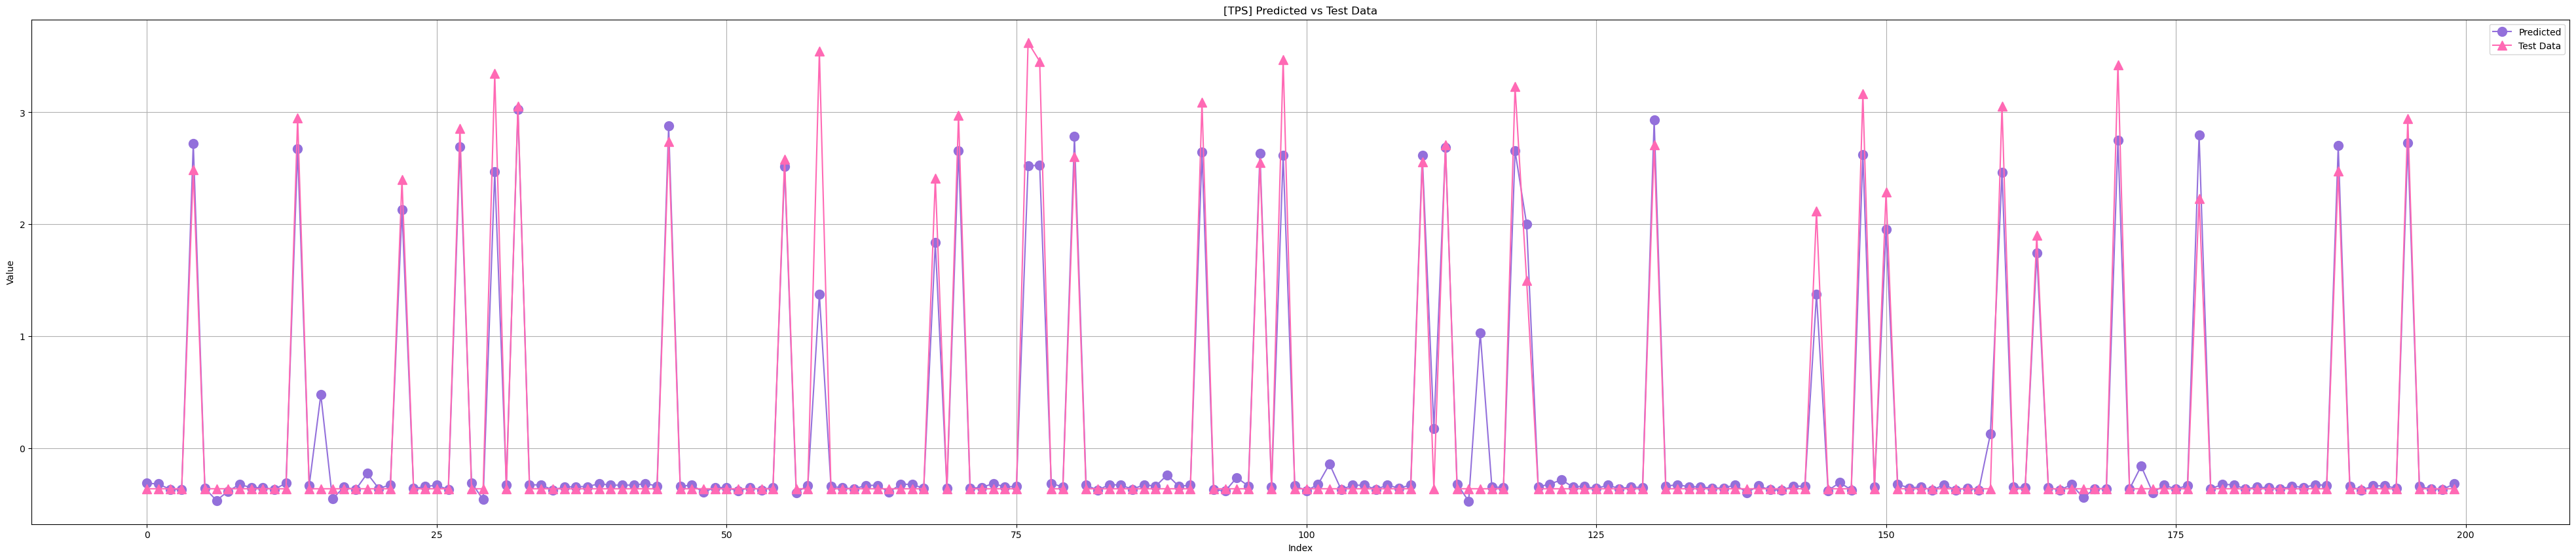

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.plot(predictions[:,0], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(scaled_y_test[:,0], label='Test Data', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[TPS] Predicted vs Test Data')
plt.legend()
plt.grid(True)
plt.show()


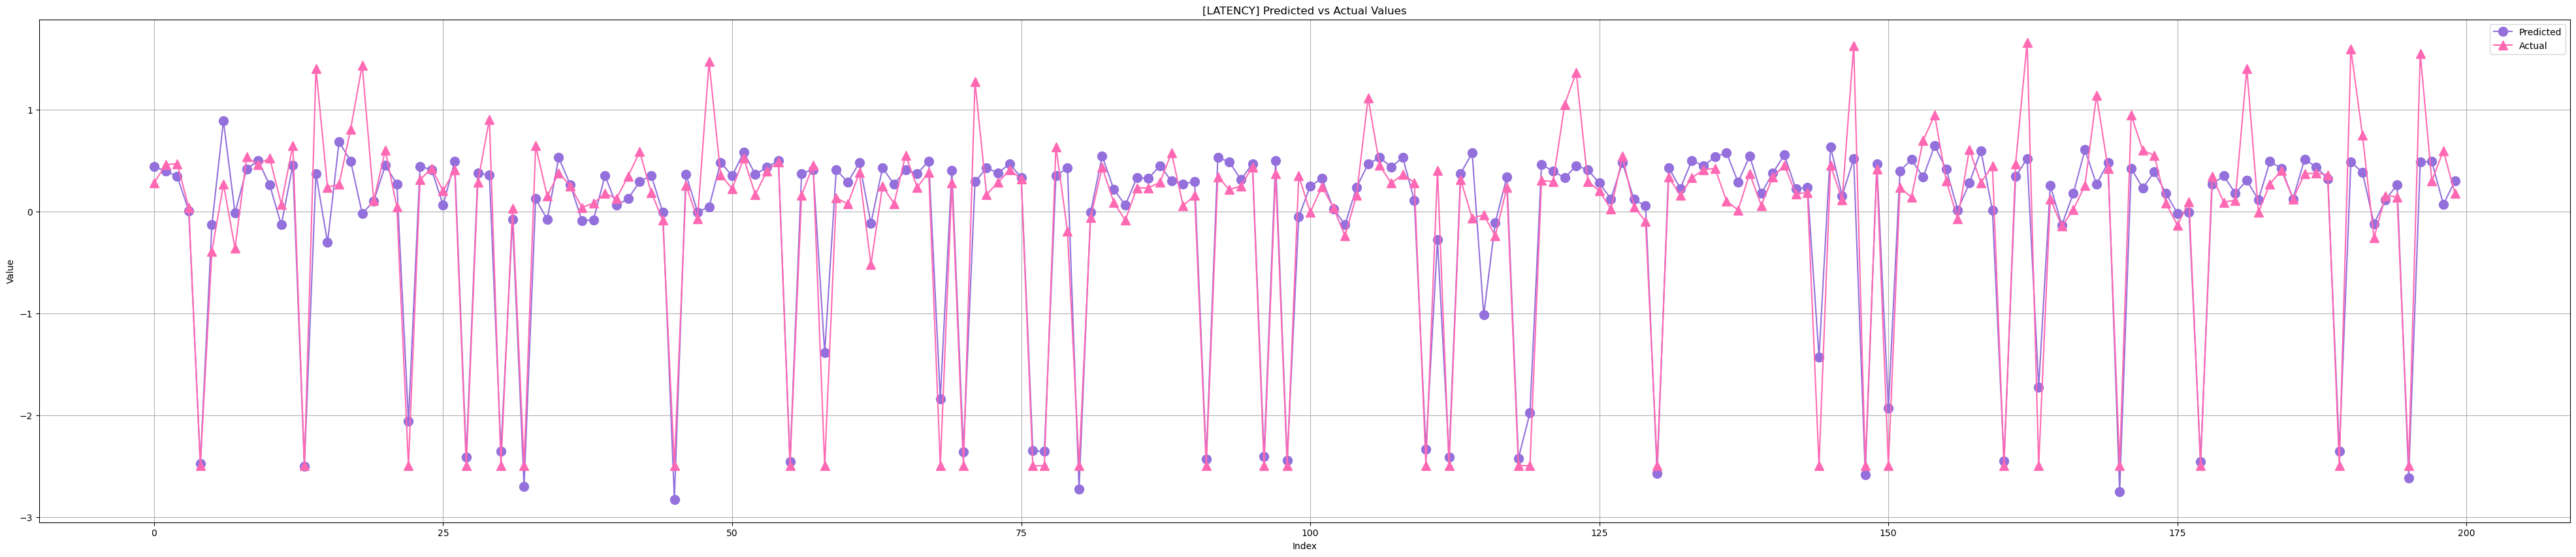

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.plot(predictions[:,1], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(scaled_y_test[:,1], label='Actual', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[LATENCY] Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


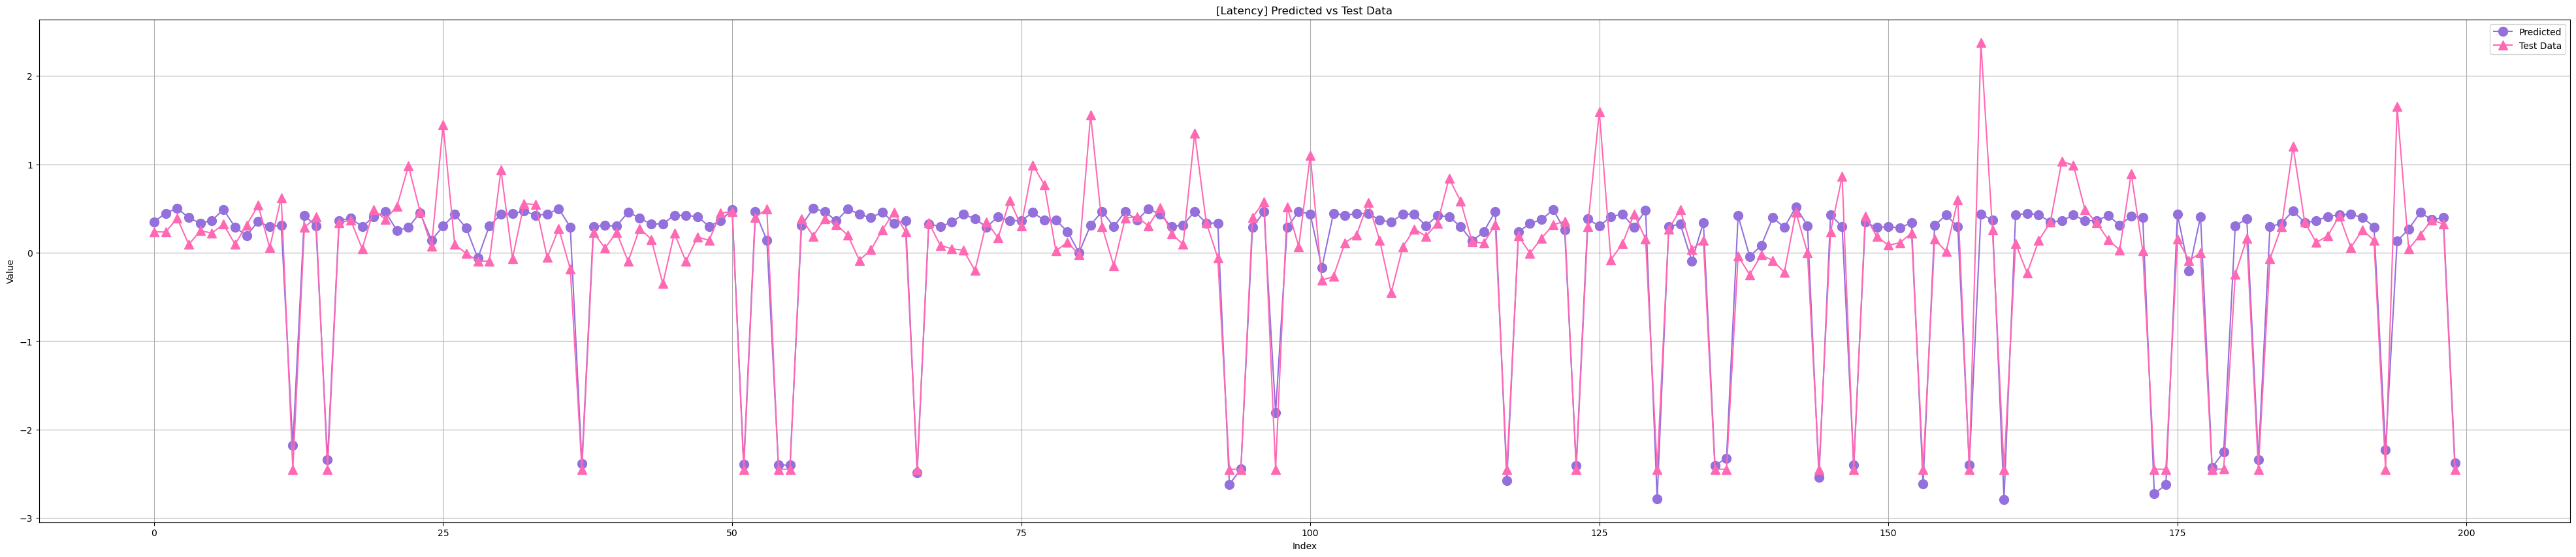

In [135]:
import matplotlib.pyplot as plt

# 예측값과 실제 값 추출
predicted_values = predictions
actual_values = scaled_y_test

# 그래프 그리기
plt.figure(figsize=(50, 10))
plt.plot(predicted_values[:,1], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(actual_values[:,1], label='Test Data', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[Latency] Predicted vs Test Data')
plt.legend()
plt.grid(True)
plt.show()


### LHS SAMPLING (make samples #4000)

In [13]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']

knob_info


,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [14]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        
    
#np.random.seed(72)
    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    
    for fidx in range(nfeats):
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples

A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)


In [15]:
num_data = np.array(mm_sample)

In [16]:
sample_list = []
for ll in mm_sample:
    val = list(ll.values())
    sample_list.append(val)

In [17]:
samples = sample_list
samples = np.array(samples)

In [18]:
### Predict Metrics with New Samples)

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

new_X = np.array(samples)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)

predictions_new = regressor.predict(new_X_) #scaling O


In [19]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

predictions_new_df = pd.DataFrame(predictions_new) 

inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)


new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)


new_metrics_re = new_metrics_re.reset_index()

In [ ]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)
new_metrics_re

In [21]:
new_X_pd = pd.DataFrame(new_X)

for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)
new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)

### AE Train set에 추가 (1000 + 4000) AUG == new_Samples

In [22]:
newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

### AutoEncoder (raw data + new data)

In [31]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler_conf = MinMaxScaler()
scaler_tps = MinMaxScaler()
scaler_lat = MinMaxScaler()

scaled_samples = scaler_conf.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler_tps.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler_lat.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=256, shuffle=True)


In [32]:
import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,32),        
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
  
        nn.Linear(32,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Autoencoder().to(device)


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

trainloss = []
validationloss = []
epoch_list = []

for epoch in range(25000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)

  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))

### Optimization in latent space (TabNet)
- Prediction

In [30]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.4988, 0.4170, 0.5771,  ..., 0.5938, 0.6097, 0.5323],
        [0.4951, 0.4585, 0.4517,  ..., 0.5713, 0.5723, 0.5054],
        [0.5076, 0.4989, 0.6004,  ..., 0.5512, 0.6010, 0.5483],
        ...,
        [0.5146, 0.4918, 0.5144,  ..., 0.5667, 0.5845, 0.4648],
        [0.5304, 0.4620, 0.4307,  ..., 0.5676, 0.5738, 0.4927],
        [0.5050, 0.5011, 0.5390,  ..., 0.5226, 0.5494, 0.5318]],
       device='cuda:0')


In [34]:
label_total = torch.tensor(X_test)
recon_total = model(torch.tensor(X_test).to("cuda").float())

label_total_np = label_total.detach().cpu().numpy()
recon_total_np = recon_total.detach().cpu().numpy()

all_concat = np.concatenate([label_total_np,recon_total_np] )
all_concat.shape

(2000, 140)

In [36]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

r3 = tsne_model.fit_transform(all_concat)


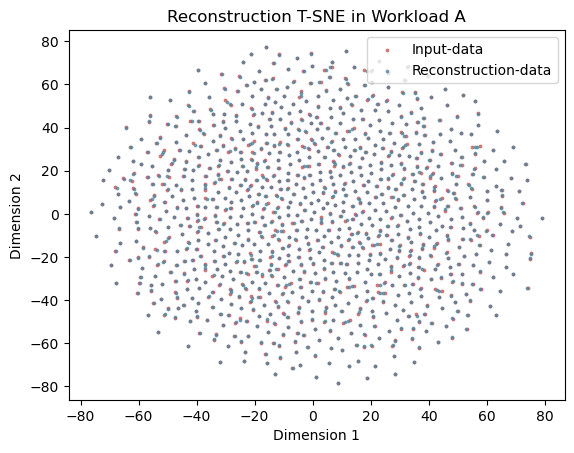

<Figure size 2000x1000 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt


plt.scatter(r3[:1000, 0], r3[:1000, 1], s=3, color='#D37676',  label='Input-data')
plt.scatter(r3[1000:, 0], r3[1000:, 1], s=3, color='#51829B', alpha=0.7, label='Reconstruction-data')

plt.title('Reconstruction T-SNE in Workload A')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(20,10))
plt.show()



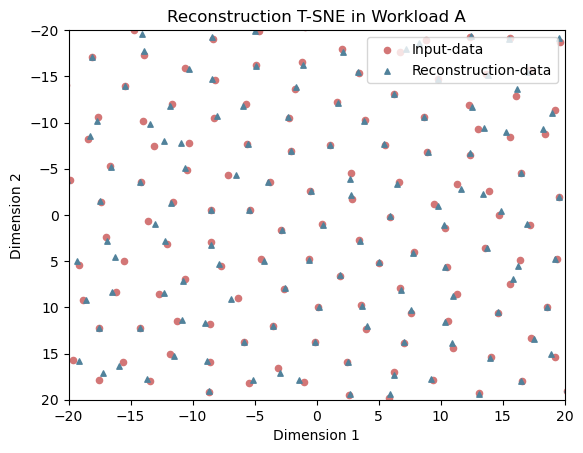

<Figure size 3000x3000 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt


plt.scatter(r3[:1000, 0], r3[:1000, 1], s=20, color='#D37676',  label='Input-data')
plt.scatter(r3[1000:, 0], r3[1000:, 1], s=15, color='#51829B', marker='^', label='Reconstruction-data')



plt.title('Reconstruction T-SNE in Workload A')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.xlim(-20, 20)  
plt.ylim(20, -20)

plt.legend(loc='upper right')
plt.figure(figsize=(30,30))
plt.show()



### Prediction Model
- input : Latent Space of AE
- output : metric

In [ ]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)

lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=500, 
              batch_size = 516,
              max_epochs=10000,
              eval_metric=['mse'])

lt_predictions = lt_regressor.predict(lt_X_test)

print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))





In [140]:
print(r2_score(scaled_lt_y_test[:,0], lt_predictions[:,0])) #TPS
print(r2_score(scaled_lt_y_test[:,1], lt_predictions[:,1])) #LATENCY


0.9894430502520647
0.9389409199390805


In [60]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T

In [132]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor,config_info_path=None,):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        self.regressor = regressor
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)

    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)

    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        x = x.reshape(1, -1)

        res = self.regressor.predict(x)
        res = res[:,0] / res[:,1]

        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=2.5, xi=0.001)
        
                self.optimizer.maximize(n_iter=self.iteration, init_points=150, acquisition_function=self.acquisition_function)
    

### Bayesian Optimization

In [ ]:
tuner1 = BO(iteration=1000, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re,
           regressor=lt_regressor
           )

tuner1.tune()
best = tuner1.optimizer.max #max of the tuned config's score


In [50]:
ex_data =[0.2674, 0.3304, 0.6424, 0.09704, 0.8512, 0.8459, 0.4732, 0.4474, 0.8108,
          0.9238, 0.3662, 0.1817, 0.6052, 0.9395, 0.7801, 0.5615, 0.4154, 0.8053,
          0.9147, 0.009781, 0.09562, 0.006069, 0.5733, 0.5874, 0.9629, 0.8225,
          0.665, 0.8474, 0.6895, 0.9567, 0.2566, 0.1469]

### BO's optimized value Decoding

In [123]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    model.eval()
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[3.7413e-06, 8.4620e-01, 5.8084e-01, 5.9696e-01, 4.2499e-01, 2.6545e-03,
         2.1802e-01, 1.6252e-02, 9.4153e-01, 3.6980e-02, 7.8347e-22, 8.3471e-01,
         7.8462e-01, 1.0000e+00, 9.9034e-01, 9.9453e-01, 2.2623e-02, 1.2638e-19,
         8.7247e-01, 3.9614e-01, 5.5523e-01, 6.4900e-02, 5.7069e-01, 9.8196e-01,
         9.9484e-01, 9.8004e-01, 9.6452e-01, 9.2598e-01, 5.5085e-02, 1.9164e-01,
         4.6567e-02, 2.6456e-10, 3.9722e-09, 5.8136e-01, 5.2423e-02, 4.4283e-01,
         9.9998e-01, 1.8429e-01, 6.8811e-01, 9.7872e-01, 9.7816e-01, 2.0235e-01,
         7.4541e-02, 9.2789e-01, 1.6250e-01, 2.6885e-01, 5.8425e-01, 9.2258e-01,
         2.2325e-02, 6.2888e-01, 3.4185e-02, 1.0440e-01, 2.8577e-01, 9.8327e-01,
         9.9739e-01, 4.1246e-01, 2.2293e-01, 3.0203e-01, 3.4625e-28, 2.9410e-01,
         1.0000e+00, 1.0437e-02, 8.6644e-01, 2.1069e-01, 9.8281e-01, 3.3845e-01,
         9.9581e-01, 1.1126e-01, 1.0000e+00, 2.6164e-01, 1.8381e-04, 8.1802e-01,
         1.41

In [125]:
converted_values = [float(value) for value in decode_value[0]]

df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))



In [126]:
real_bo_config

,0
0,0.000003741
1,0.846197188
2,0.580841184
3,0.596961558
4,0.424985468
...,...
133,0.657133579
134,0.096352570
135,0.952311158
136,0.322338939


In [127]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.000003741,50771.985076845,6092278.124511719,596961.557865143,425007.318939805,0.002654537,2289360.157348633,17450978.000000000,6.590742052,1.109400429,...,138094.913508326,848965.942859650,1934.752005339,9972.685922980,5.483447753,10766.476562500,103458709.334968567,124870.161499023,42943.534301758,0.187310174


In [128]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 0
back_log  = 50772
binlog_cache_size  = 6092278
binlog_group_commit_sync_delay  = 596962
binlog_group_commit_sync_no_delay_count  = 425007
binlog_rows_query_log_events  = 0
binlog_stmt_cache_size  = 2289360
bulk_insert_buffer_size  = 17450978
default_week_format  = 7
div_precision_increment  = 1
end_markers_in_json  = 0
eq_range_index_dive_limit  = 8347
expire_logs_days  = 5
explicit_defaults_for_timestamp  = 1
flush_time  = 178
ft_min_word_len  = 16
ft_query_expansion_limit  = 23
general_log  = 0
group_concat_max_len  = 3574
innodb_adaptive_hash_index_parts  = 203
innodb_adaptive_max_sleep_delay  = 555229
innodb_autoextend_increment  = 66
innodb_buffer_pool_size  = 10265368384
innodb_change_buffer_max_size  = 49
innodb_cmp_per_index_enabled  = 1
innodb_commit_concurrency  = 980
innodb_compression_failure_threshold_pct  = 96
innodb_compression_level  = 8
innodb_compression_pad_pct_max  = 4
innodb_concurrency_tickets  = 19165
innodb_deadlock_detect  = 0
innod